Processing:   0%|          | 0/1 [00:00<?, ?it/s]

训练参数：网络：SeEANet, 簇:6, 间隔时间: 16, 数据融合算法: PCA
semg 数据形状为： torch.Size([133422, 6, 256])
angle 数据形状为： torch.Size([133422, 3])
开始第1次训练！！！
Epoch 100, train_idnex=1, Train Loss: 143.94754, Test Loss: 164.86503
Epoch 200, train_idnex=1, Train Loss: 62.77837, Test Loss: 125.51662
Epoch 300, train_idnex=1, Train Loss: 28.44069, Test Loss: 46.48030
Epoch 400, train_idnex=1, Train Loss: 12.02183, Test Loss: 21.53873
Epoch 500, train_idnex=1, Train Loss: 7.40041, Test Loss: 13.00208
Epoch 600, train_idnex=1, Train Loss: 5.72246, Test Loss: 10.88690
Epoch 700, train_idnex=1, Train Loss: 5.01836, Test Loss: 10.19083
Epoch 800, train_idnex=1, Train Loss: 4.67760, Test Loss: 9.73070
Epoch 900, train_idnex=1, Train Loss: 4.51237, Test Loss: 9.53285
Epoch 1000, train_idnex=1, Train Loss: 4.42313, Test Loss: 9.46710
Epoch 1100, train_idnex=1, Train Loss: 4.37608, Test Loss: 9.40489
Epoch 1200, train_idnex=1, Train Loss: 4.35460, Test Loss: 9.39417
Epoch 1300, train_idnex=1, Train Loss: 4.34024, Test Loss:

Processing: 100%|██████████| 1/1 [10:25:08<00:00, 37508.63s/it]

metrics.json 文件已保存到: /home/admin123/SATData/Run/SeEANet/04-22-11:33:41/MJ_PCA_16_256/metrics.json
字典已成功保存到 /home/admin123/SATData/Run/04-22-11:33:41/data.json


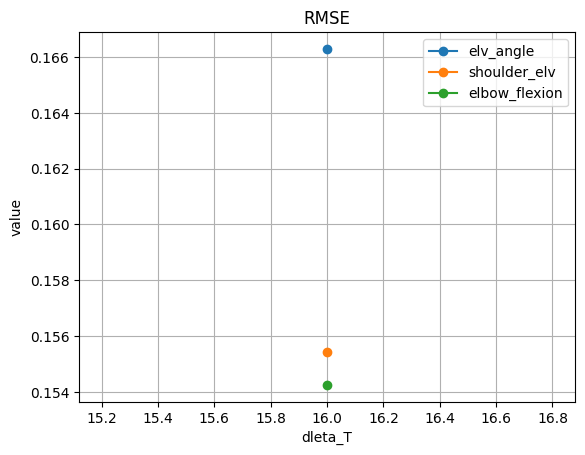

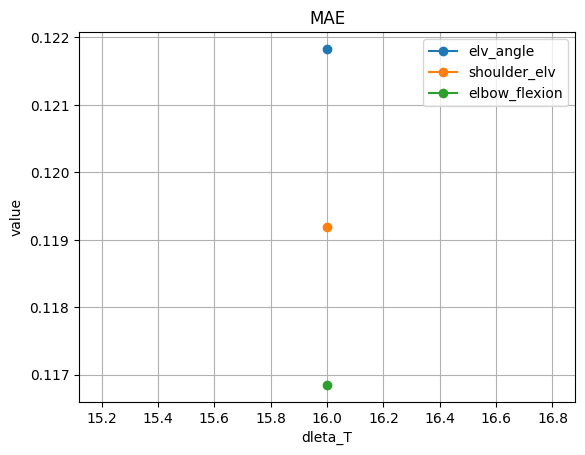

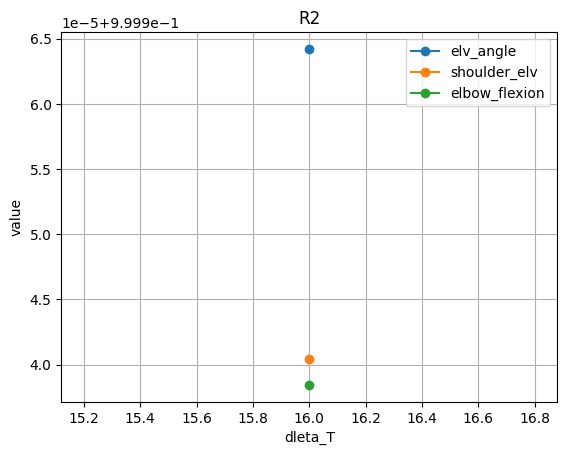

In [ ]:
# 验证 delta_T
from utils.train_func import train_func
from datetime import datetime
from tqdm import tqdm
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from utils.tools import make_dir


modelList = ['SeEANet', 'SAT', 'MyoNet']
data_dict = {}
# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
# delta_Tlist = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90 ,100, 120, 140, 160, 180, 200, 230, 260, 300]
# delta_Tlist = [260, 300]

# # people_List = ['S01', 'S02', "S03"]
# people_List = ['S01']

# delta_Tlist = [i for i in range(21, 31)]
people_List = ['S01', 'S02', "S03", "S04", "S05"]
# people_List = ['S01']

delta_T  = 17
WLlist = [160, 192, 224, 256]

saveDir = "/home/admin123/SATData/Run"
dataDir = "/home/admin123/SATData/data"

rmseL = []
maeL = []
r2L = []
formatted_time = datetime.now().strftime("%m-%d-%H:%M:%S")
make_dir(os.path.join(saveDir, formatted_time))
for WindowLength in tqdm(WLlist, desc="Processing", position=0):
    rmse, mae, r2 = train_func(modelName='SeEANet', epochs=1500, train_num=10, delta_T=delta_T, windowLength=WindowLength, 
                               formatted_time = formatted_time, peopleList=people_List, batch_size=256,
                               data_Dir=dataDir, save_Dir=saveDir)
    rmse = np.array(rmse)
    rmse_m = np.mean(rmse,axis=0)
    rmse_s = np.std(rmse, axis=0)
    rmse_d = np.max(rmse, axis=0)-np.min(rmse, axis=0)
    rmseL.append(rmse_m)

    mae = np.array(mae)
    mae_m = np.mean(mae,axis=0)
    mae_s = np.std(mae, axis=0)
    mae_d = np.max(mae, axis=0)-np.min(mae, axis=0)
    maeL.append(mae_m)

    r2 = np.array(r2)
    r2_m = np.mean(r2,axis=0)
    r2_s = np.std(r2, axis=0)
    r2_d = np.max(r2, axis=0)-np.min(r2, axis=0)
    r2L.append(r2_m)

    data_dict[f"rmse_{delta_T}"] = [list(rmse_m), list(rmse_s), list(rmse_d)]
    data_dict[f"mae_{delta_T}"] = [list(mae_m), list(mae_s), list(mae_d)]
    data_dict[f"r2_{delta_T}"] = [list(r2_m), list(r2_s), list(r2_d)]

# 指定 JSON 文件路径
file_path = os.path.join(saveDir, formatted_time, "data.json")

with open(file_path, "w", encoding="utf-8") as file:
    json.dump(data_dict, file, ensure_ascii=False, indent=4)

print(f"字典已成功保存到 {file_path}")


rmseL = np.array(rmseL)
maeL = np.array(maeL)
r2L = np.array(r2L)
delta_Tlist = WLlist
plt.figure()
png_path = os.path.join(saveDir, formatted_time, "RMSE.png")
plt.plot(delta_Tlist, rmseL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("WL")
plt.ylabel("value")
plt.grid()
plt.legend()
plt.title("RMSE")
plt.savefig(png_path, dpi=300, bbox_inches='tight')
# plt.scatter(x, y, color='r', label='Points')  # 单独绘制点 


plt.figure()
png_path = os.path.join(saveDir, formatted_time, "MAE.png")
plt.plot(delta_Tlist, rmseL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("WL")
plt.ylabel("value")
plt.title("MAE")
plt.grid()
plt.legend()
plt.savefig(png_path, dpi=300, bbox_inches='tight')


plt.figure()
png_path = os.path.join(saveDir, formatted_time, "R2.png")
plt.plot(delta_Tlist, rmseL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("WL")
plt.ylabel("value")
plt.title("R2")
plt.grid()
plt.legend()
plt.savefig(png_path, dpi=300, bbox_inches='tight')
